In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [3]:
## create the causal graph here
causal_graph = nx.DiGraph([('Page Views','Sold Units')
                           ,('Revenue','Profit')
                           ,('Unit Price','Revenue')
                           ,('Shopping Event?','Page Views')
                           ,('Shopping Event?','Sold Units')
                           ,('Shopping Event?','Ad Spend')
                           ,('Ad Spend','Page Views')
                           ,('Ad Spend','Operational Cost')
                           ,('Sold Units','Revenue')
                           ,('Sold Units','Operational Cost')
                           ,('Operational Cost','Profit')])

In [4]:
def generate_random_data(rows=30):
    date_range = pd.date_range(start="2020-01-01",end="2021-02-02")
    rows = date_range.size
    return pd.DataFrame({'Date':date_range
                         ,'Shopping Event?':[random.random()>0.95 for i in range(rows)]
                         ,'Ad Spend':random.sample(range(700,3000),rows)
                         ,'Page Views':random.sample(range(9000,15000),rows)
                         ,'Unit Price':np.ones(rows)*999
                         ,'Sold Units':random.sample(range(2000,3000),rows)
                         ,'Revenue':random.sample(range(1200,3000),rows)
                         ,'Operational Cost':random.sample(range(1500000,1800000),rows)
                         ,'Profit':random.sample(range(500,1200),rows)}).set_index('Date')


In [5]:
data_2021 = generate_random_data()
data_2021.shape

(399, 8)

In [6]:
from dowhy import gcm
scm = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(scm, data_2021)

In [7]:
gcm.fit(scm, data_2021)

Fitting causal mechanism of node Operational Cost: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.77it/s]


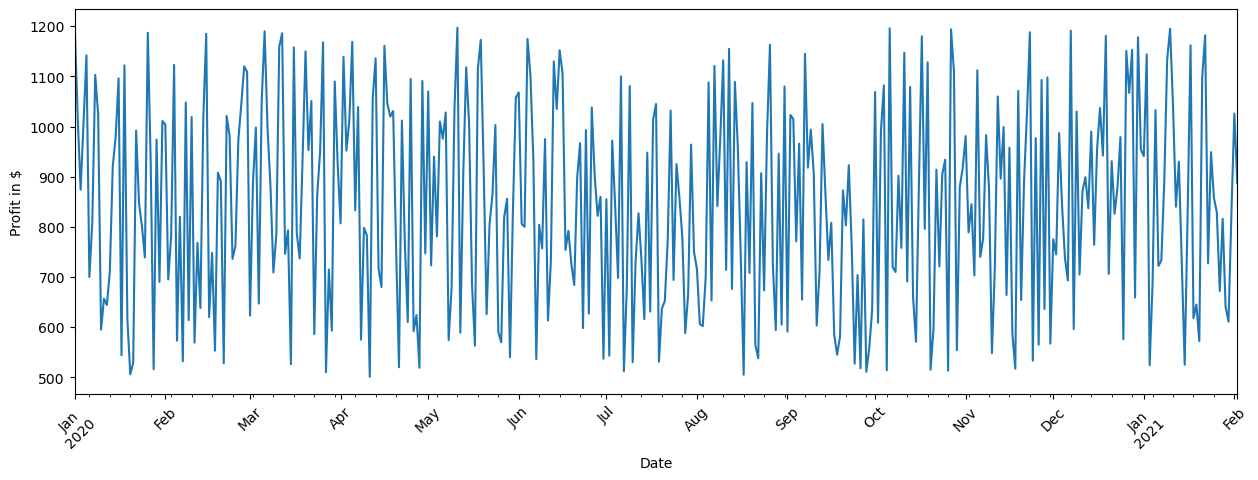

In [8]:
data_2021['Profit'].plot(ylabel='Profit in $', figsize=(15,5), rot=45)
plt.vlines(np.arange(0, data_2021.shape[0])[data_2021['Shopping Event?']], data_2021['Profit'].min(), data_2021['Profit'].max(), linewidth=10, alpha=0.3, color='r')

In [9]:
data_2021['Profit'].std()

In [10]:
def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}

In [11]:
arrow_strengths = gcm.arrow_strength(scm, target_node='Profit')
arrow_strengths

{('Operational Cost', 'Profit'): -1.4829894013634513,
 ('Revenue', 'Profit'): -15.137676795858756}

In [12]:
gcm.util.plot(causal_graph, 
              causal_strengths=convert_to_percentage(arrow_strengths), 
              )

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

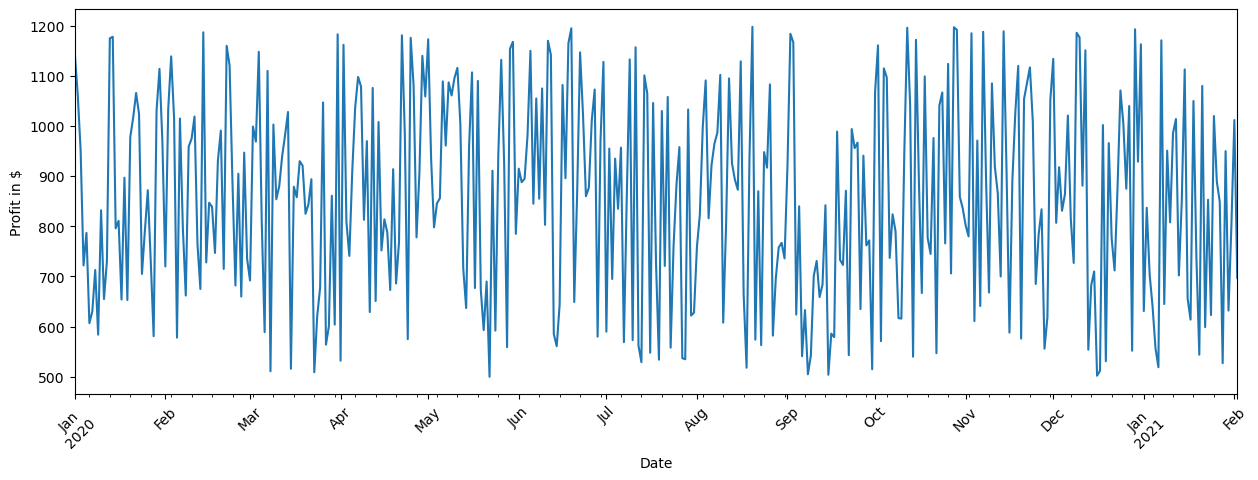

In [13]:
data_2021['Profit'].plot(ylabel='Profit in $', figsize=(15,5), rot=45)
plt.vlines(np.arange(0, data_2021.shape[0])[data_2021['Shopping Event?']], data_2021['Profit'].min(), data_2021['Profit'].max(), linewidth=10, alpha=0.3, color='r')

In [20]:
import matplotlib.pyplot as plt


def bar_plot(value_dictionary, ylabel, uncertainty_attribs=None, figsize=(8, 5)):
    value_dictionary = {k: value_dictionary[k] for k in sorted(value_dictionary)}
    if uncertainty_attribs is None:
        uncertainty_attribs = {node: [value_dictionary[node], value_dictionary[node]] for node in value_dictionary}

    _, ax = plt.subplots(figsize=figsize)
    ci_plus = [uncertainty_attribs[node][1] - value_dictionary[node] for node in value_dictionary.keys()]
    ci_minus = [value_dictionary[node] - uncertainty_attribs[node][0] for node in value_dictionary.keys()]
    yerr = np.array([ci_minus, ci_plus])
    yerr[abs(yerr) < 10**-7] = 0
    plt.bar(value_dictionary.keys(), value_dictionary.values(), yerr=yerr, ecolor='#1E88E5', color='#ff0d57', width=0.8)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.show()


iccs = gcm.intrinsic_causal_influence(scm, target_node='Profit', num_samples_randomization=10)

bar_plot(convert_to_percentage(iccs), ylabel='Variance attribution in %')

AttributeError: module 'numpy' has no attribute 'int'

In [75]:
np.int16

numpy.int16